In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import warnings
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

In [4]:
data_file = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

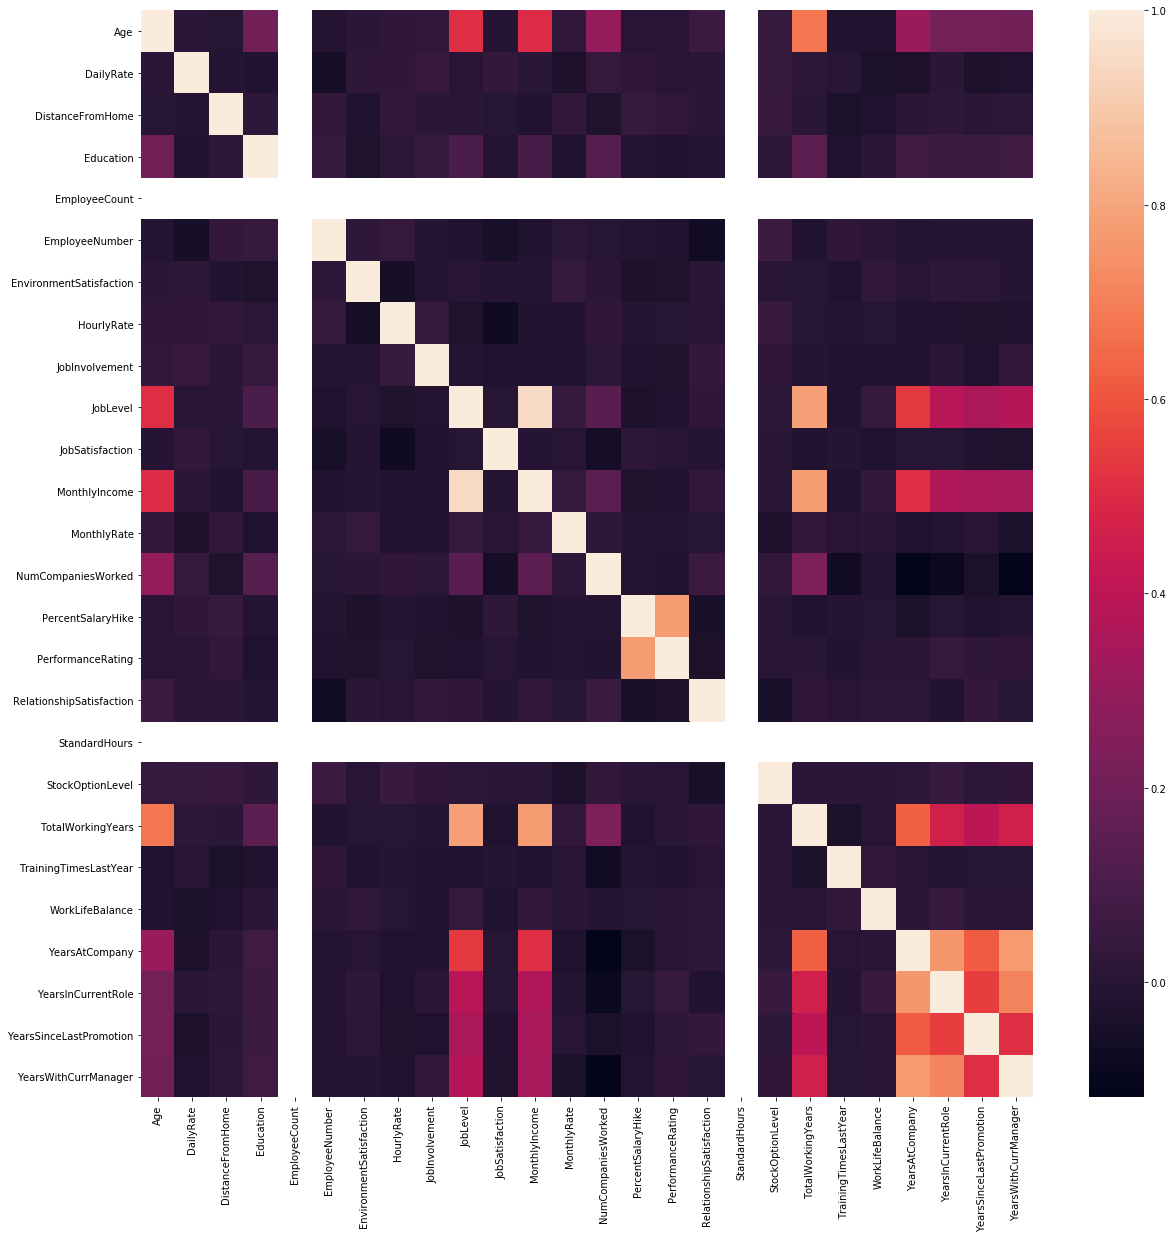

In [5]:
plt.figure(figsize=(20, 20))
sns.heatmap(data_file.corr())

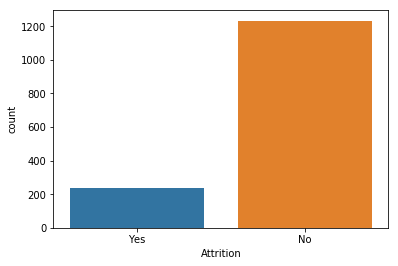

In [6]:
sns.countplot(data_file['Attrition'])
# class imbalance

In [7]:
data_file.shape

(1470, 35)

In [8]:
columns = data_file[['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus','Over18', 'OverTime']]
x = copy.deepcopy(data_file)
for column_name in columns:
    del x[column_name]
del columns['Attrition']
data = pd.get_dummies(columns)
x = pd.concat([x, data], axis = 1)
#y = x[['Attrition_No', 'Attrition_Yes']]
y = data_file[['Attrition']]

In [9]:
x.shape

(1470, 55)

In [10]:
data_file.shape

(1470, 35)

In [11]:
warnings.filterwarnings("ignore")
sm = SMOTE(random_state= 40, sampling_strategy= "auto")
x_resampled, y_resampled = sm.fit_resample(x,y)

clf_smote = sklearn.svm.LinearSVC(x_resampled, y_resampled)
print(x.shape)
print(x_resampled.shape)
print(clf_smote)

(1470, 55)
(2466, 55)
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1,
          loss=array(['Yes', 'No', 'Yes', ..., 'Yes', 'Yes', 'Yes'], dtype=object),
          max_iter=1000, multi_class='ovr',
          penalty=array([[  41, 1102,    1, ...,    1,    0,    1],
       [  49,  279,    8, ...,    1,    1,    0],
       [  37, 1373,    2, ...,    1,    0,    1],
       ...,
       [  31,  700,    1, ...,    1,    0,    0],
       [  32,  802,   11, ...,    1,    0,    0],
       [  23,  116,   13, ...,    1,    0,    0]], dtype=int64),
          random_state=None, tol=0.0001, verbose=0)


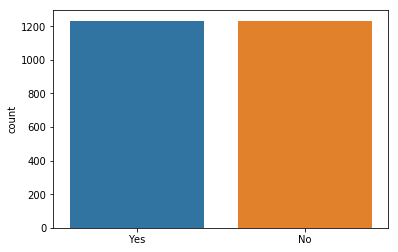

In [12]:
sns.countplot(y_resampled)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size =0.3, shuffle=True)
lr = LogisticRegression()
lr.fit(x_train, y_train)

prediction = lr.predict(x_test).reshape(-1, 1)
acc_score = accuracy_score(prediction, y_test)

print("Accuracy: ", acc_score)
print()
print("Coefficients: ",(lr.coef_))
print()
print("Intercept: ",lr.intercept_)
print()
print(classification_report(prediction, y_test))

Accuracy:  0.9337837837837838

Coefficients:  [[-1.50527941e-02 -1.79011677e-04  4.15771302e-02 -6.52589304e-02
   2.32137789e-03 -6.72539034e-05 -3.92163182e-01 -9.22141139e-04
  -5.69871522e-01 -4.22033249e-01 -4.78843043e-01 -1.20318133e-05
   1.51213545e-06  1.59756500e-01 -1.85531672e-02 -8.17020538e-02
  -2.54411212e-01  1.85710231e-01 -2.65572646e-01 -4.37663869e-02
  -9.26896497e-02 -3.92713681e-01  1.10404128e-01 -1.43598094e-01
   1.51164331e-01 -1.19153011e-01 -1.91224586e+00 -2.80712098e-01
  -1.00699667e+00 -1.06866165e+00 -1.27984245e+00 -8.08739935e-01
  -4.45457982e-01 -1.30162326e+00 -9.66498699e-01 -1.51083550e+00
  -1.06853300e+00 -3.45663903e-01 -1.68042594e+00 -1.37053550e+00
  -1.02121558e+00 -8.92045432e-01 -1.84507272e-01 -6.49774110e-01
  -5.75337566e-01 -3.18480928e-01 -9.59035583e-01 -4.48194741e-01
  -6.76221222e-02 -1.90908842e+00 -1.64248643e+00 -1.05798360e+00
   2.32137789e-03 -2.42353762e+00 -6.26819031e-01]]

Intercept:  [0.00232138]

              pre

In [14]:
x_train.shape


(1726, 55)

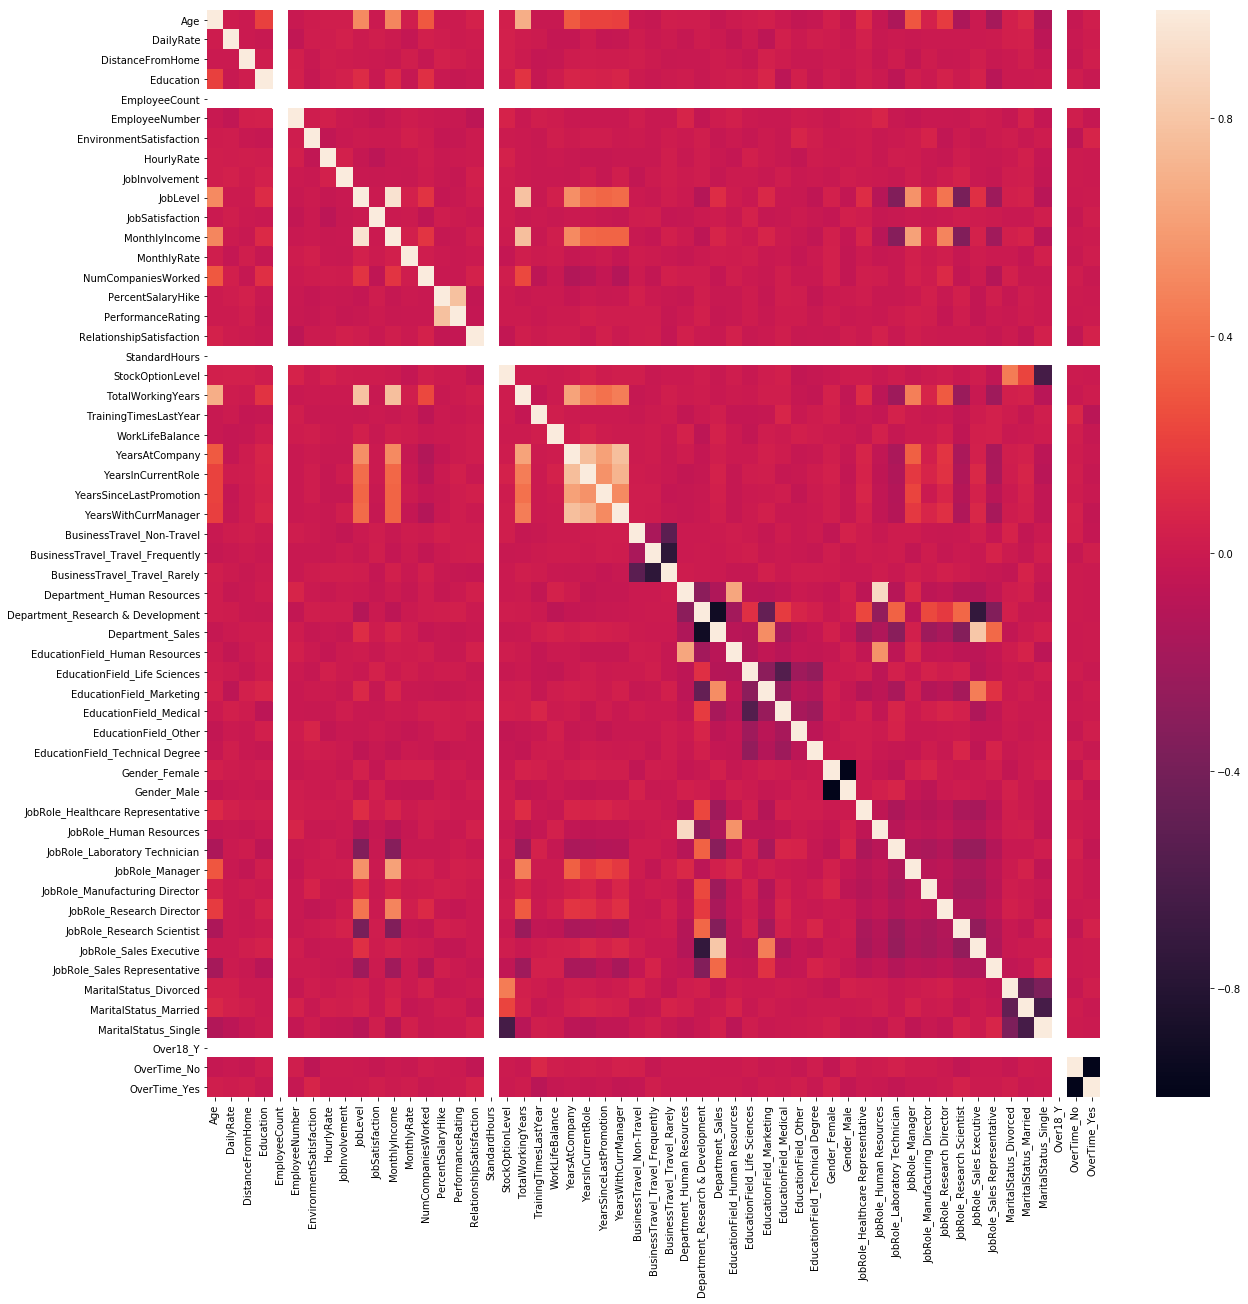

In [15]:
#prediction
plt.figure(figsize=(20, 20))
sns.heatmap(x.corr())

In [16]:
x.shape

(1470, 55)

# K-Nearest Neighbor

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size =0.3, shuffle=True)
kn = KNeighborsClassifier(n_neighbors= 5)
kn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [18]:
predict = kn.predict(x_test)

In [19]:
print(accuracy_score(predict, y_test))
print(classification_report(predict, y_test))
print(kn.score(x_test, y_test))
print(confusion_matrix(predict, y_test))

0.7662162162162162
              precision    recall  f1-score   support

          No       0.61      0.90      0.73       258
         Yes       0.93      0.70      0.79       482

    accuracy                           0.77       740
   macro avg       0.77      0.80      0.76       740
weighted avg       0.82      0.77      0.77       740

0.7662162162162162
[[232  26]
 [147 335]]


# Flask

In [ ]:
# Using an application like Postman, the user data is collected with the help of flask

In [20]:
from flask import Flask, request, jsonify, Blueprint, Response
import pandas as pd
import sys

In [21]:
app = Flask(__name__)
predict = ""
new_x = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
del new_x["Attrition"]
test_df = pd.DataFrame()
data_dummy = pd.DataFrame()

In [22]:
new_x.shape

(1470, 34)

In [23]:
@app.route("/input", methods = ['POST'])
def input_from_user():
    global predict
    global new_x
    global test_df
    global data_dummy
    
    data = request.get_json()
    test_df = pd.DataFrame([data])
    try:
        new_x = pd.concat([new_x, test_df], axis = 0, ignore_index =True)
        columns = new_x[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus',"Over18" ,'OverTime']]
    
        for column_name in columns:
            del new_x[column_name]

        data_dummy = pd.get_dummies(columns)
        new_x = pd.concat([new_x, data_dummy], axis = 1, ignore_index=True)
        new_x.fillna(0, inplace = True)
        row, column = new_x.shape
        predict = lr.predict(new_x[row-1 :])

        return jsonify(data)
    except ValueError:
        print("New Feature added!, please make sure you have given valid inputs and try again(restart).")
        print("Program has Terminated.")
        sys.exit(0)

@app.route("/output", methods = ['GET'])
def output_to_user():
    global predict
    global new_x
    print("Result: ", predict)
    row, column = new_x.shape
    print("Probability of {} is {}".format(predict, lr.predict_proba(new_x[row-1 :])[:, 1]))
    return jsonify(predict.tolist())
if __name__ == "__main__":
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
